In [45]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
seed = 42

In [46]:
data = pd.read_csv("datass/dataset.csv")

In [47]:
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]


In [48]:
data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [49]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [50]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

In [51]:
categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [53]:
clf = SVC(kernel='rbf')
scaler = StandardScaler()

scaler.fit_transform(x_train)
clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat) 
confusion = confusion_matrix(y_val, y_hat)  # Calcola la matrice di confusione

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.91
Confusion Matrix:
[[1488   29]
 [ 134  152]]


In [54]:
res = []

for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    for gamma in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        scaler = StandardScaler()

        scaler.fit_transform(x_train)
        clf.fit(scaler.fit_transform(x_train), y_train)
        y_hat = clf.predict(scaler.transform(x_val))

        accuracy = accuracy_score(y_val, y_hat)
        precision = precision_score(y_val, y_hat)
        recall = recall_score(y_val, y_hat)
        f1 = f1_score(y_val, y_hat)

        print(f'{C=}, {gamma=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
        res.append({
            'C': C,
            'gamma': gamma,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

C=0.001, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.021544346900318832, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.1, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.46415888336127775, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.021544346900318832, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.1, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.46415888336127775, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.021544346900318832, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.1, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.46415888336127775, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.004641588833612777, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
C=0.1, gamma=0.021544346900318832, accuracy=0.8696616749861342, precision=0.8923076923076924, recall=0.20279720279720279, f1=0.33048433048433046


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.1, accuracy=0.877426511369939, precision=0.8421052631578947, recall=0.27972027972027974, f1=0.4199475065616798


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.46415888336127775, accuracy=0.8574597892401553, precision=0.7457627118644068, recall=0.15384615384615385, f1=0.25507246376811593


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=2.154434690031882, accuracy=0.8419301164725458, precision=1.0, recall=0.0034965034965034965, f1=0.006968641114982578


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

C=0.1, gamma=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.001, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
C=0.46415888336127775, gamma=0.004641588833612777, accuracy=0.8796450360510261, precision=0.8876404494382022, recall=0.2762237762237762, f1=0.4213333333333333


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.021544346900318832, accuracy=0.8912922906267332, precision=0.835820895522388, recall=0.3916083916083916, f1=0.5333333333333333


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.1, accuracy=0.9007210205213533, precision=0.8364779874213837, recall=0.46503496503496505, f1=0.597752808988764


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.46415888336127775, accuracy=0.8935108153078203, precision=0.8309859154929577, recall=0.4125874125874126, f1=0.5514018691588785


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=2.154434690031882, accuracy=0.8541320022185247, precision=0.8709677419354839, recall=0.0944055944055944, f1=0.17034700315457413


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=10.0, accuracy=0.8441486411536329, precision=1.0, recall=0.017482517482517484, f1=0.03436426116838488


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=46.41588833612773, accuracy=0.8424847476428176, precision=1.0, recall=0.006993006993006993, f1=0.013888888888888888


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

C=0.46415888336127775, gamma=215.44346900318823, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=1000.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
C=2.154434690031882, gamma=0.001, accuracy=0.8796450360510261, precision=0.8791208791208791, recall=0.27972027972027974, f1=0.4244031830238727


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.004641588833612777, accuracy=0.8912922906267332, precision=0.8040540540540541, recall=0.4160839160839161, f1=0.5483870967741935


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.021544346900318832, accuracy=0.9029395452024404, precision=0.8245614035087719, recall=0.493006993006993, f1=0.6170678336980306


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.1, accuracy=0.9107043815862451, precision=0.8272251308900523, recall=0.5524475524475524, f1=0.6624737945492661


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.46415888336127775, accuracy=0.8996117581808097, precision=0.7536231884057971, recall=0.5454545454545454, f1=0.6328600405679513


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=2.154434690031882, accuracy=0.8552412645590682, precision=0.6, recall=0.26223776223776224, f1=0.3649635036496351


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=10.0, accuracy=0.8508042151968941, precision=0.7073170731707317, recall=0.10139860139860139, f1=0.17737003058103976


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=46.41588833612773, accuracy=0.8480310593455352, precision=0.7727272727272727, recall=0.05944055944055944, f1=0.11038961038961038


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=215.44346900318823, accuracy=0.8463671658347199, precision=0.9090909090909091, recall=0.03496503496503497, f1=0.06734006734006734


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=1000.0, accuracy=0.8435940099833611, precision=1.0, recall=0.013986013986013986, f1=0.027586206896551724


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.001, accuracy=0.8912922906267332, precision=0.8040540540540541, recall=0.4160839160839161, f1=0.5483870967741935


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.004641588833612777, accuracy=0.8968386023294509, precision=0.808641975308642, recall=0.458041958041958, f1=0.5848214285714286


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.021544346900318832, accuracy=0.9140321686078757, precision=0.8393782383419689, recall=0.5664335664335665, f1=0.6764091858037578


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.1, accuracy=0.9101497504159733, precision=0.803921568627451, recall=0.5734265734265734, f1=0.6693877551020408


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.46415888336127775, accuracy=0.8824181919023849, precision=0.6434108527131783, recall=0.5804195804195804, f1=0.6102941176470588


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=2.154434690031882, accuracy=0.8524681087077094, precision=0.5757575757575758, recall=0.26573426573426573, f1=0.36363636363636365


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=10.0, accuracy=0.8502495840266223, precision=0.6904761904761905, recall=0.10139860139860139, f1=0.17682926829268292


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=46.41588833612773, accuracy=0.8480310593455352, precision=0.7727272727272727, recall=0.05944055944055944, f1=0.11038961038961038


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=215.44346900318823, accuracy=0.8463671658347199, precision=0.9090909090909091, recall=0.03496503496503497, f1=0.06734006734006734


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=1000.0, accuracy=0.8435940099833611, precision=1.0, recall=0.013986013986013986, f1=0.027586206896551724


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.001, accuracy=0.8946200776483638, precision=0.7962962962962963, recall=0.45104895104895104, f1=0.5758928571428571


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.004641588833612777, accuracy=0.9068219633943427, precision=0.8314606741573034, recall=0.5174825174825175, f1=0.6379310344827586


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.021544346900318832, accuracy=0.9129229062673322, precision=0.8241206030150754, recall=0.5734265734265734, f1=0.6762886597938145


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.1, accuracy=0.9040488075429839, precision=0.7383966244725738, recall=0.6118881118881119, f1=0.6692160611854685


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.46415888336127775, accuracy=0.8641153632834165, precision=0.5694915254237288, recall=0.5874125874125874, f1=0.5783132530120483


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=2.154434690031882, accuracy=0.8508042151968941, precision=0.5620437956204379, recall=0.2692307692307692, f1=0.36406619385342787


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=10.0, accuracy=0.8502495840266223, precision=0.6904761904761905, recall=0.10139860139860139, f1=0.17682926829268292


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=46.41588833612773, accuracy=0.8480310593455352, precision=0.7727272727272727, recall=0.05944055944055944, f1=0.11038961038961038


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=215.44346900318823, accuracy=0.8463671658347199, precision=0.9090909090909091, recall=0.03496503496503497, f1=0.06734006734006734


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=1000.0, accuracy=0.8435940099833611, precision=1.0, recall=0.013986013986013986, f1=0.027586206896551724


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.001, accuracy=0.8973932334997227, precision=0.806060606060606, recall=0.46503496503496505, f1=0.58980044345898


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.004641588833612777, accuracy=0.9112590127565169, precision=0.8214285714285714, recall=0.5629370629370629, f1=0.6680497925311203


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.021544346900318832, accuracy=0.9112590127565169, precision=0.8088235294117647, recall=0.5769230769230769, f1=0.673469387755102


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.1, accuracy=0.8912922906267332, precision=0.6730769230769231, recall=0.6118881118881119, f1=0.6410256410256411


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.46415888336127775, accuracy=0.8624514697726012, precision=0.5641891891891891, recall=0.583916083916084, f1=0.5738831615120275


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=2.154434690031882, accuracy=0.8519134775374376, precision=0.5664335664335665, recall=0.28321678321678323, f1=0.3776223776223776


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=10.0, accuracy=0.8502495840266223, precision=0.6904761904761905, recall=0.10139860139860139, f1=0.17682926829268292


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=46.41588833612773, accuracy=0.8480310593455352, precision=0.7727272727272727, recall=0.05944055944055944, f1=0.11038961038961038


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=215.44346900318823, accuracy=0.8463671658347199, precision=0.9090909090909091, recall=0.03496503496503497, f1=0.06734006734006734


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=1000.0, accuracy=0.8435940099833611, precision=1.0, recall=0.013986013986013986, f1=0.027586206896551724


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.001, accuracy=0.9068219633943427, precision=0.8314606741573034, recall=0.5174825174825175, f1=0.6379310344827586


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.004641588833612777, accuracy=0.9129229062673322, precision=0.8241206030150754, recall=0.5734265734265734, f1=0.6762886597938145


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.021544346900318832, accuracy=0.9101497504159733, precision=0.7924528301886793, recall=0.5874125874125874, f1=0.674698795180723


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.1, accuracy=0.8707709373266778, precision=0.5874587458745875, recall=0.6223776223776224, f1=0.6044142614601019


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.46415888336127775, accuracy=0.8546866333887965, precision=0.54, recall=0.5664335664335665, f1=0.5529010238907851


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=2.154434690031882, accuracy=0.8524681087077094, precision=0.5704225352112676, recall=0.28321678321678323, f1=0.3785046728971963


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=10.0, accuracy=0.8502495840266223, precision=0.6904761904761905, recall=0.10139860139860139, f1=0.17682926829268292


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=46.41588833612773, accuracy=0.8480310593455352, precision=0.7727272727272727, recall=0.05944055944055944, f1=0.11038961038961038


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=215.44346900318823, accuracy=0.8463671658347199, precision=0.9090909090909091, recall=0.03496503496503497, f1=0.06734006734006734


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=1000.0, accuracy=0.8435940099833611, precision=1.0, recall=0.013986013986013986, f1=0.027586206896551724


In [55]:
heatmap_data = pd.DataFrame(res).pivot(index='C', columns='gamma', values='Recall')
heatmap_data

gamma,0.001000,0.004642,0.021544,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
C,,,,,,,,,,
0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.004642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.021544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.100000,0.000000,0.000000,0.202797,0.279720,0.153846,0.003497,0.000000,0.000000,0.000000,0.000000
0.464159,0.000000,0.276224,0.391608,0.465035,0.412587,0.094406,0.017483,0.006993,0.000000,0.000000
2.154435,0.279720,0.416084,0.493007,0.552448,0.545455,0.262238,0.101399,0.059441,0.034965,0.013986
10.000000,0.416084,0.458042,0.566434,0.573427,0.580420,0.265734,0.101399,0.059441,0.034965,0.013986
46.415888,0.451049,0.517483,0.573427,0.611888,0.587413,0.269231,0.101399,0.059441,0.034965,0.013986
215.443469,0.465035,0.562937,0.576923,0.611888,0.583916,0.283217,0.101399,0.059441,0.034965,0.013986


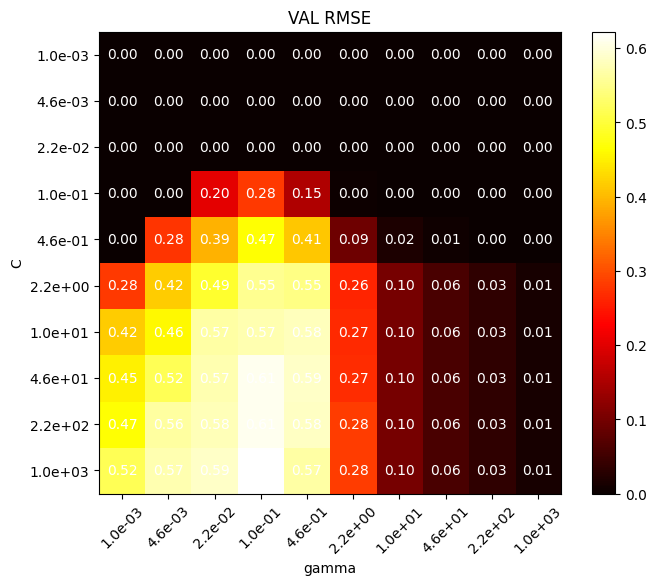

In [56]:
p_range = np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True)
p_range_str = [f'{p:.1e}' for p in p_range]

fig, ax = plt.subplots(figsize=(8,6))

heatmap = ax.imshow(
    heatmap_data,
    interpolation="nearest",
    cmap=plt.cm.hot,
)

data_v = heatmap_data.values
for i in range(data_v.shape[0]):
    for j in range(data_v.shape[1]):
        c = 'black' if data_v[i, j] >= 1 else 'white'
        ax.text(j, i, f'{data_v[i, j]:.2f}', ha='center', va='center', color=c, fontsize=10)


ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.colorbar(heatmap, ax=ax)
ax.set_xticks(np.arange(len(p_range)), p_range_str, rotation=45)
ax.set_yticks(np.arange(len(p_range)), p_range_str)
plt.title("VAL RMSE")
plt.show()

In [57]:
df = pd.DataFrame(res)
df.iloc[df.Recall.argmax()]

C            1000.000000
gamma           0.100000
Accuracy        0.870771
Precision       0.587459
Recall          0.622378
F1-score        0.604414
Name: 93, dtype: float64

In [58]:
C = 1000.000000
gamma = 0.100000

In [59]:
print(f'SVC, {C=}, {gamma=}')
clf = SVC(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()

clf.fit(scaler.fit_transform(x_train), y_train)

y_hat_val = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat_val)
precision = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy=}, {recall=}')


SVC, C=1000.0, gamma=0.1


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VAL: accuracy=0.8707709373266778, recall=0.6223776223776224


In [60]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1392  125]
 [ 108  178]]


Text(0.5, 23.52222222222222, 'Prediction')

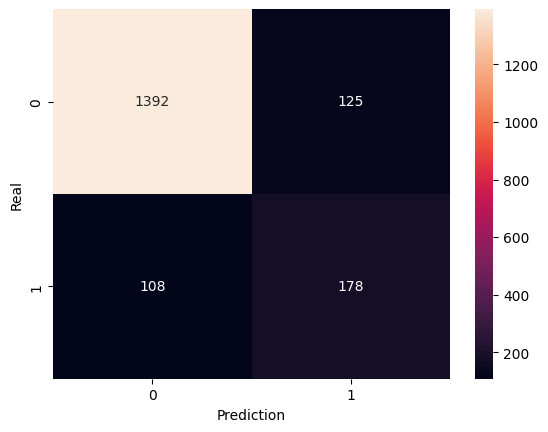

In [61]:
sns.heatmap(confusion_matrix(y_val, y_hat_val), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

### FEATURE SELECTION for SVM

In [69]:
import itertools
from tqdm import tqdm

In [70]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [71]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [72]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [66]:
C

1000.0

In [67]:
gamma

0.1

In [77]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.3, random_state=seed, shuffle=True)

K = 2    # Numero di features da escluder (dopo calcola tutte le combinazioni possibili)
all_cols = [c for c in list(x_train.columns.values)]
assert 1 <= K and K <= len(all_cols)
print(f'>>> {K=}')

cols = [list(x) for x in itertools.combinations(all_cols, K)]

scaler = StandardScaler()
res = []
for c in tqdm(cols):
    _x_train = x_train.drop(columns=c) 
    _x_val = x_val.drop(columns=c)

    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    y_hat = clf.predict(scaler.transform(_x_val))
    recall = recall_score(y_val, y_hat)
    res.append({
        'dropping': c,
        'remaining_cols': list(_x_train.columns.values),
        'Recall': recall,
    })


print(res)
pd.DataFrame(res).to_csv(f'_{K}_select.csv') # Salva il file con tutte le accuracy in base alla combinazione
print('>>> Saved')

>>> K=2


  0%|          | 0/78 [00:00<?, ?it/s]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  1%|▏         | 1/78 [00:04<05:59,  4.67s/it]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|▎         | 2/78 [00:09<05:47,  4.57s/it]C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-package

[{'dropping': ['Dependent_count', 'Total_Relationship_Count'], 'remaining_cols': ['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'], 'Recall': 0.49078341013824883}, {'dropping': ['Dependent_count', 'Months_Inactive_12_mon'], 'remaining_cols': ['Total_Relationship_Count', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'], 'Recall': 0.5046082949308756}, {'dropping': ['Dependent_count', 'Contacts_Count_12_mon'], 'remaining_cols': ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Income_Category_$120K +', 

In [76]:
df_max = pd.read_csv('_1_select.csv')

max_raw = df_max[df_max['Recall'] == df_max['Recall'].max()]
print(max_raw)


   Unnamed: 0      dropping  \
6           6  ['Gender_F']   
7           7  ['Gender_M']   

                                      remaining_cols    Recall  
6  ['Dependent_count', 'Total_Relationship_Count'...  0.582949  
7  ['Dependent_count', 'Total_Relationship_Count'...  0.582949  


In [79]:
df_max = pd.read_csv('_2_select.csv')

max_raw = df_max[df_max['Recall'] == df_max['Recall'].max()]
print(max_raw)

    Unnamed: 0                                           dropping  \
72          72  ['Income_Category_$40K - $60K', 'Income_Catego...   

                                       remaining_cols    Recall  
72  ['Dependent_count', 'Total_Relationship_Count'...  0.589862  
